<a href="https://colab.research.google.com/github/AppleYT9/currency-converter/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Deeplearning

In [2]:
import os
import shutil
import random
import itertools
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from keras import backend
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import decode_predictions, preprocess_input

In [6]:
# Loading data and preprocessing images according to mobilenet requirements
# Creating batches of data

labels = ['Flooding', 'No Flooding']
train_path = '/content/train'
valid_path = '/content/valid'
test_path = '/content/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 31 images belonging to 3 classes.
Found 31 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [7]:
#Loading pre-trained lightweight mobilenet image classifier
mobile = tf.keras.applications.mobilenet.MobileNet()
# mobile.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
x = mobile.layers[-6].output

In [9]:
output = Dense(units=2, activation='softmax')(x)

In [10]:
model = Model(inputs=mobile.input, outputs=output)

In [11]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [22]:
# model.summary()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 as the feature extractor
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Fix shape mismatch
    Dense(3, activation='softmax')  # Match 2 classes: 'Flooding' & 'No Flooding'
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print summary to verify output shapes
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [21]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
4/4 - 14s - 3s/step - accuracy: 0.4839 - loss: 1.0021 - val_accuracy: 0.4839 - val_loss: 0.9171
Epoch 2/10
4/4 - 6s - 2s/step - accuracy: 0.4839 - loss: 0.8747 - val_accuracy: 0.4839 - val_loss: 0.7688
Epoch 3/10
4/4 - 6s - 2s/step - accuracy: 0.4839 - loss: 0.7236 - val_accuracy: 0.4839 - val_loss: 0.6450
Epoch 4/10
4/4 - 4s - 1s/step - accuracy: 0.6129 - loss: 0.6171 - val_accuracy: 0.9677 - val_loss: 0.5385
Epoch 5/10
4/4 - 4s - 1s/step - accuracy: 1.0000 - loss: 0.5059 - val_accuracy: 1.0000 - val_loss: 0.4506
Epoch 6/10
4/4 - 6s - 2s/step - accuracy: 1.0000 - loss: 0.4261 - val_accuracy: 1.0000 - val_loss: 0.3796
Epoch 7/10
4/4 - 7s - 2s/step - accuracy: 1.0000 - loss: 0.3515 - val_accuracy: 1.0000 - val_loss: 0.3250
Epoch 8/10
4/4 - 5s - 1s/step - accuracy: 1.0000 - loss: 0.3091 - val_accuracy: 1.0000 - val_loss: 0.2819
Epoch 9/10
4/4 - 4s - 1s/step - accuracy: 1.0000 - loss: 0.2672 - val_accuracy: 1.0000 - val_loss: 0.2470
Epoch 10/10
4/4 - 4s - 973ms/step - accuracy:

In [24]:
model.save("fine_tuned_flood_detection_model.keras")  # Save in Keras format


In [25]:

test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
precision = precision_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
f1_score = f1_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
accuracy = accuracy_score(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
print('Precision: ', precision)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)

Precision:  1.0
F1 Score:  1.0
Accuracy:  1.0


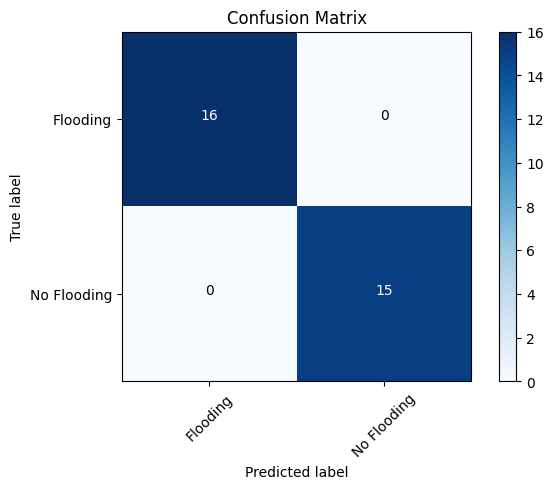

In [27]:
test_batches.class_indices
cm_plot_labels = ['Flooding','No Flooding']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [40]:
def preprocess_image(file):
    img_path = '/content/evaluate'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

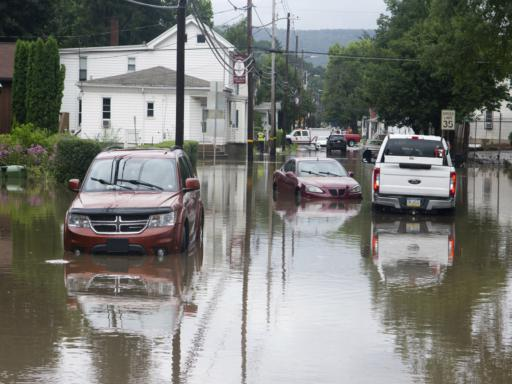

In [46]:
# Display image which we want to predict
from IPython.display import Image
Image(filename='/content/evaluate/1.jpg', width=300,height=200)

In [47]:
# Preprocess image and make prediction

preprocessed_image = preprocess_image('/1.jpg')
predictions = model.predict(preprocessed_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [48]:
# Print predicted accuracy scores for both classes, i.e. (1) Flooding, (2) No Flooding
predictions

array([[0.44867486, 0.38576338, 0.16556181]], dtype=float32)

In [49]:
result = np.argmax(predictions)

In [50]:
# Print the predicted class label
labels[result]

'Flooding'

In [39]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful